In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('FInal_Data.csv',encoding = "ISO-8859-1")

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

ValueError: labels ['Unnamed: 0'] not contained in axis

In [ ]:
df.columns

In [ ]:
df = df[['Name','Age','Club','Country','Position','C_Goals','Goals','C_Assists','Assists','C_Apps','Club_Appearances',
    'C_Clean_Sheets','Clean Sheets','C_Mins','Minutes_played_club','F_Rating','F_Def','F_Drib', 'F_Pace', 'F_Passing', 'F_Phy',
        'F_Shooting', 'F_WRate', 'FantasyLeaguePoints','FantasyLeagueVal','Goals_per_game','Mins_per_goal','Wiki_Views',
    'Previous_Value','Current_Value'
   ]]

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
pd.set_option('display.max_columns', 30)

In [ ]:
df.head(50)

In [ ]:
df['Position'].unique()

# Converting Previous Values(price) to Million Euros

In [ ]:
print("Mill. ?" in df[df['Name'] == 'David López']['Previous_Value'].values[0])
float(df[df['Name'] == 'David López']['Previous_Value'].values[0].replace(' Mill. ?','').replace(',','.'))

In [ ]:
print(" Th. ?" in df[df['Name'] == 'Momo']['Previous_Value'].values[0])
float(df[df['Name'] == 'Momo']['Previous_Value'].values[0].replace(' Th. ?',''))/1000

In [ ]:
def impute_previous_val(cols):
    pv=cols[0]
    if "Mill. ?" in pv:
        return float(pv.replace(' Mill. ?','').replace(',','.'))
    elif " Th. ?" in pv:
        return float(pv.replace(' Th. ?',''))/1000
    else:
        return pv


In [ ]:
df['PreviousValue'] = df[['Previous_Value']].apply(impute_previous_val,axis=1)

In [ ]:
df.drop('Previous_Value',axis=1,inplace=True)

In [ ]:
print(' Mill. ' in df[df['Name'] == 'David López']['Current_Value'].values[0])
float(df[df['Name'] == 'David López']['Current_Value'].values[0].replace(' Mill. ','').replace(',','.'))

In [ ]:
print(' Th. ' in df[df['Name'] == 'Aythami Artiles']['Current_Value'].values[0])
float(df[df['Name'] == 'Aythami Artiles']['Current_Value'].values[0].replace(' Th. ',''))/1000

In [ ]:
def impute_current_val(cols):
    pv=cols[0]
    if ' Mill. ' in pv:
        return float(pv.replace(' Mill. ','').replace(',','.'))
    elif ' Th. ' in pv:
        return float(pv.replace(' Th. ',''))/1000
    else:
        return pv

In [ ]:
df['CurrentValue'] = df[['Current_Value']].apply(impute_current_val,axis=1)

In [ ]:
df.drop('Current_Value',axis=1,inplace=True)

In [ ]:
df.info()

In [ ]:
df['Wiki_Views'] = df['Wiki_Views'].str.replace(',','')

In [ ]:
df['Wiki_Views'] = df['Wiki_Views'].astype(int)

In [ ]:
df.info()

In [ ]:
df.loc[294,'Goals_per_game'] = '0.125'

In [ ]:
df['Goals_per_game'] = df['Goals_per_game'].astype(float)

In [ ]:
df.info()

In [ ]:
df['F_WRate'].unique()

In [ ]:
def impute_wrate(cols):
    wr = cols[0]
    if wr == "Medium / Medium":
        return "M"
    elif wr == "High / Low":
        return "M"
    elif wr == "High / Medium":
        return "H"
    elif wr == "Medium / High":
        return "H"
    elif wr == "High / High":
        return "H"
    elif wr == "No":
        return "N"
    elif wr == "Medium / Low":
        return "L"
    elif wr == "Low / Medium":
        return "L"
    elif wr == "Low / High":
        return "M"

In [ ]:
df['F_WRate'] = df[['F_WRate']].apply(impute_wrate,axis=1)

In [ ]:
df['Position'].unique()

In [ ]:
posi_replace = {"Position" : {'Right Wing':'Winger', 'Defensive Midfield':'CDM', 'Left Wing':'Winger' , 
                              'Central Midfield':'CM', 'Left-Back':'Defender', 'Centre-Forward':'Striker', 'Centre-Back':'Defender',
                             'Right-Back':'Defender', 'Secondary Striker':'Striker', 'Attacking Midfield':'CM','Left Midfield':'CM'}}

In [ ]:
df.replace(posi_replace,inplace=True)

In [ ]:
df['Country'].unique()

In [ ]:
country_replace = {"Country" : {'Argentina': 2, 'Spain' : 1, 'France':2, 'Croatia':3, 'Uruguay':3, 'Brazil':2,
       'Germany':2, 'Portugal':3, 'Netherlands':3, 'Turkey':4, 'Belgium':3,
       'Slovenia':4, 'Montenegro':4, 'Ghana':4, 'Paraguay':3, 'Italy':2, 'Colombia':2,
       'Wales':3, 'Costa Rica':3, 'Morocco':4, 'Denmark':3, 'Chile':3, 'Serbia':4,
       'Sweden':3, 'DR Congo':4, 'Russia':3, 'Algeria':4, 'Mexico':3, 'Japan':4,
       'Romania':4, 'Switzerland':3, 'Ecuador':4, 'Guadeloupe':4, 'Greece':4,
       'Venezuela':4, 'Nigeria':4, 'Macedonia':4}}

In [ ]:
df.replace(country_replace,inplace=True)

In [ ]:
df.info()

In [ ]:
df['Club'].unique()

In [ ]:
club_replace= {"Club_Cat" : { 'FC Barcelona':1, 'Atlético Madrid':1, 'RCD Espanyol Barcelona':3,
       'Real Sociedad':2, 'Athletic Bilbao':2, 'Valencia CF':2, 'Real Madrid':1,
       'Celta de Vigo':2, 'Villarreal CF':2, 'Real Betis Balompié':3,
       'Sevilla FC':2, 'SD Eibar':3, 'Deportivo de La Coruña':4, 'Getafe CF':4,
       'CD Leganés':4, 'Deportivo Alavés':4, 'Girona FC':4, 'Málaga CF':3,
       'Levante UD':4, 'UD Las Palmas':4}}

In [ ]:
df['Club_Cat'] = df['Club']

In [ ]:
df.replace(club_replace,inplace=True)

In [ ]:
df.info()

In [ ]:
df['TotalGoals'] = df['C_Goals']+df['Goals']

In [ ]:
df['TotalAssists'] = df['Assists']+df['C_Assists']

In [ ]:
df

In [ ]:
df.columns

In [ ]:
df['TotalApps'] = df['C_Apps']+df['Club_Appearances']  

In [ ]:
df.columns

In [ ]:
df.to_csv('data.csv',encoding='utf-8',index=False)   

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Name,IconicStar,Age,Club,Country,Position,C_Goals,Goals,C_Assists,Assists,...,FantasyLeagueVal,Goals_per_game,Mins_per_goal,Wiki_Views,PreviousValue,CurrentValue,Club_Cat,TotalGoals,TotalAssists,TotalApps
0,Lionel Messi,1.0,30,FC Barcelona,2,Winger,14,37,7,12,...,30.0,1.09,77.000,23736,120.0,180.0,1,51,19,52
1,Sergio Busquets,NaN,29,FC Barcelona,1,CDM,1,0,2,3,...,11.5,0.00,NaN,1124,60.0,80.0,1,1,5,48
2,Ousmane Dembélé,NaN,20,FC Barcelona,2,Winger,0,6,1,13,...,3.5,0.18,340.000,4782,33.0,80.0,1,6,14,34
3,Ivan Rakitic,NaN,29,FC Barcelona,3,CM,0,7,3,6,...,15.0,0.22,335.000,9,45.0,45.0,1,7,9,48
4,Jordi Alba,NaN,28,FC Barcelona,1,Defender,1,1,6,6,...,13.0,0.04,1.966,792,32.0,40.0,1,2,12,42


In [5]:
df['CurrentValue'].describe()

count    316.000000
mean      12.308228
std       19.592737
min        0.100000
25%        2.500000
50%        5.000000
75%       15.000000
max      180.000000
Name: CurrentValue, dtype: float64

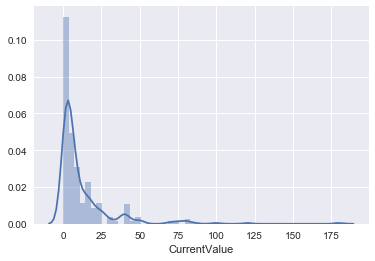

In [6]:
sns.distplot(df['CurrentValue'])

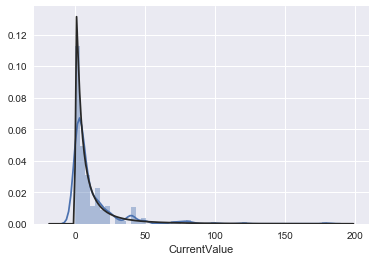

In [7]:
import scipy.stats as st
sns.distplot(df['CurrentValue'],fit=st.lognorm)

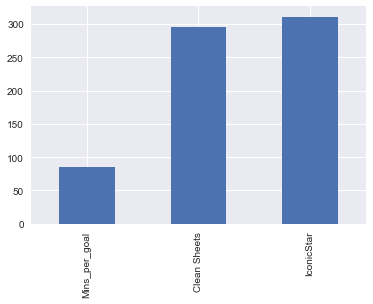

In [8]:
missing =df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [9]:
print("Skewness: %f" % df['CurrentValue'].skew())
print("Kurtosis: %f" % df['CurrentValue'].kurt())

Skewness: 3.938356
Kurtosis: 22.197160


In [10]:
df.columns

Index(['Name', 'IconicStar', 'Age', 'Club', 'Country', 'Position', 'C_Goals',
       'Goals', 'C_Assists', 'Assists', 'C_Apps', 'Club_Appearances',
       'C_Clean_Sheets', 'Clean Sheets', 'C_Mins', 'Minutes_played_club',
       'F_Rating', 'F_Def', 'F_Drib', 'F_Pace', 'F_Passing', 'F_Phy',
       'F_Shooting', 'F_WRate', 'FantasyLeaguePoints', 'FantasyLeagueVal',
       'Goals_per_game', 'Mins_per_goal', 'Wiki_Views', 'PreviousValue',
       'CurrentValue', 'Club_Cat', 'TotalGoals', 'TotalAssists', 'TotalApps'],
      dtype='object')

In [11]:
df[df['IconicStar'] == 1]

,Name,IconicStar,Age,Club,Country,Position,C_Goals,Goals,C_Assists,Assists,...,FantasyLeagueVal,Goals_per_game,Mins_per_goal,Wiki_Views,PreviousValue,CurrentValue,Club_Cat,TotalGoals,TotalAssists,TotalApps
0,Lionel Messi,1.0,30,FC Barcelona,2,Winger,14,37,7,12,...,30.0,1.09,77.0,23736,120.0,180.0,1,51,19,52
5,Luis Suárez,1.0,30,FC Barcelona,3,Striker,11,29,1,15,...,24.0,0.83,99.0,4844,90.0,85.0,1,40,16,50
24,Antoine Griezmann,1.0,26,Atlético Madrid,2,Striker,5,16,4,8,...,20.5,0.44,192.0,4189,80.0,100.0,1,21,12,51
113,Cristiano Ronaldo,1.0,32,Real Madrid,3,Striker,3,25,2,6,...,23.0,0.86,102.0,32002,100.0,120.0,1,28,8,42
115,Gareth Bale,1.0,28,Real Madrid,3,Winger,4,7,1,3,...,3.5,0.37,204.0,4811,80.0,75.0,1,11,4,24


In [12]:
df['IconicStar'].fillna(value=0,inplace=True)

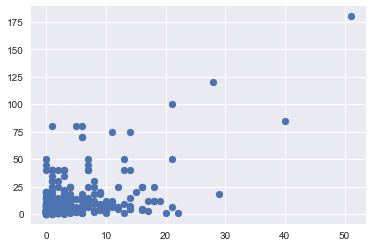

In [13]:
plt.scatter(df['TotalGoals'],df['CurrentValue'])

In [14]:
forwards = df[(df['Position'] == 'Winger') | (df['Position'] == 'Striker')]

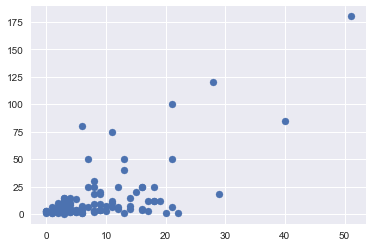

In [15]:
plt.scatter(forwards['TotalGoals'],forwards['CurrentValue'])

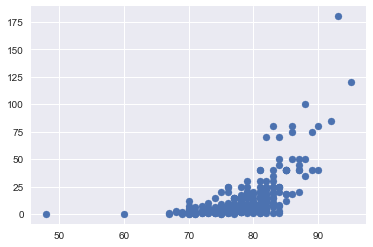

In [16]:
plt.scatter(df['F_Rating'],df['CurrentValue'])

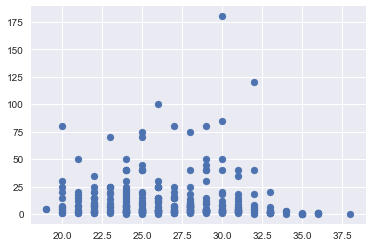

In [17]:
plt.scatter(df['Age'],df['CurrentValue'])

(array([ 14.,  34.,  48.,  60.,  53.,  50.,  29.,  17.,  10.,   1.]),
 array([ 19. ,  20.9,  22.8,  24.7,  26.6,  28.5,  30.4,  32.3,  34.2,
         36.1,  38. ]),
 <a list of 10 Patch objects>)

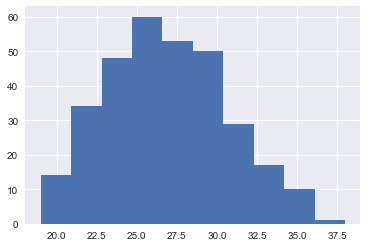

In [18]:
plt.hist(df['Age'])

In [19]:
df.columns

Index(['Name', 'IconicStar', 'Age', 'Club', 'Country', 'Position', 'C_Goals',
       'Goals', 'C_Assists', 'Assists', 'C_Apps', 'Club_Appearances',
       'C_Clean_Sheets', 'Clean Sheets', 'C_Mins', 'Minutes_played_club',
       'F_Rating', 'F_Def', 'F_Drib', 'F_Pace', 'F_Passing', 'F_Phy',
       'F_Shooting', 'F_WRate', 'FantasyLeaguePoints', 'FantasyLeagueVal',
       'Goals_per_game', 'Mins_per_goal', 'Wiki_Views', 'PreviousValue',
       'CurrentValue', 'Club_Cat', 'TotalGoals', 'TotalAssists', 'TotalApps'],
      dtype='object')

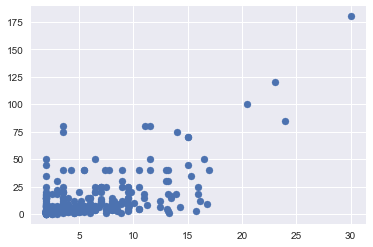

In [20]:
plt.scatter(df['FantasyLeagueVal'],df['CurrentValue'])

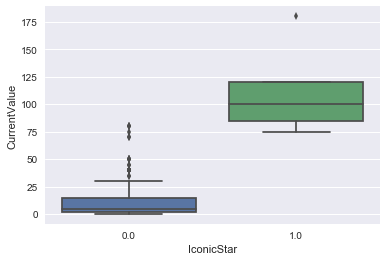

In [21]:
sns.boxplot(x='IconicStar',y='CurrentValue',data=df)

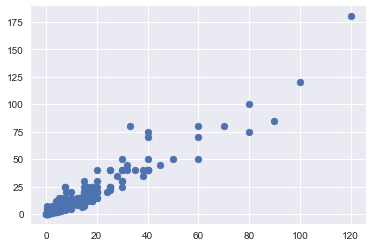

In [22]:
plt.scatter(df['PreviousValue'],df['CurrentValue'])

In [23]:
df.columns

Index(['Name', 'IconicStar', 'Age', 'Club', 'Country', 'Position', 'C_Goals',
       'Goals', 'C_Assists', 'Assists', 'C_Apps', 'Club_Appearances',
       'C_Clean_Sheets', 'Clean Sheets', 'C_Mins', 'Minutes_played_club',
       'F_Rating', 'F_Def', 'F_Drib', 'F_Pace', 'F_Passing', 'F_Phy',
       'F_Shooting', 'F_WRate', 'FantasyLeaguePoints', 'FantasyLeagueVal',
       'Goals_per_game', 'Mins_per_goal', 'Wiki_Views', 'PreviousValue',
       'CurrentValue', 'Club_Cat', 'TotalGoals', 'TotalAssists', 'TotalApps'],
      dtype='object')

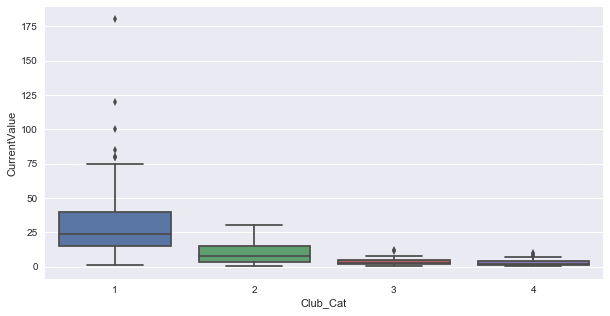

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Club_Cat',y='CurrentValue',data=df)

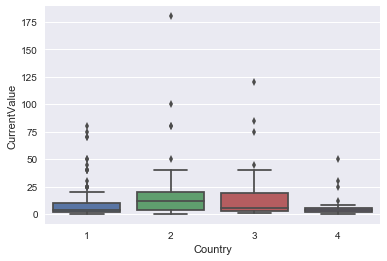

In [25]:
sns.boxplot(x='Country',y='CurrentValue',data=df)

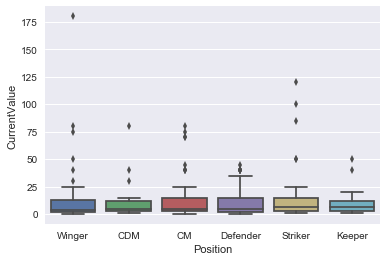

In [26]:
sns.boxplot(x='Position',y='CurrentValue',data=df)

In [27]:
df.columns

Index(['Name', 'IconicStar', 'Age', 'Club', 'Country', 'Position', 'C_Goals',
       'Goals', 'C_Assists', 'Assists', 'C_Apps', 'Club_Appearances',
       'C_Clean_Sheets', 'Clean Sheets', 'C_Mins', 'Minutes_played_club',
       'F_Rating', 'F_Def', 'F_Drib', 'F_Pace', 'F_Passing', 'F_Phy',
       'F_Shooting', 'F_WRate', 'FantasyLeaguePoints', 'FantasyLeagueVal',
       'Goals_per_game', 'Mins_per_goal', 'Wiki_Views', 'PreviousValue',
       'CurrentValue', 'Club_Cat', 'TotalGoals', 'TotalAssists', 'TotalApps'],
      dtype='object')

In [28]:
df['TotalMinsClub'] = df['C_Mins']+df['Minutes_played_club']

In [29]:
df.drop(['Club','C_Goals','Goals','C_Assists','Assists','C_Apps', 'Club_Appearances','C_Mins', 'Minutes_played_club'],axis=1,inplace=True)

In [30]:
df.columns

Index(['Name', 'IconicStar', 'Age', 'Country', 'Position', 'C_Clean_Sheets',
       'Clean Sheets', 'F_Rating', 'F_Def', 'F_Drib', 'F_Pace', 'F_Passing',
       'F_Phy', 'F_Shooting', 'F_WRate', 'FantasyLeaguePoints',
       'FantasyLeagueVal', 'Goals_per_game', 'Mins_per_goal', 'Wiki_Views',
       'PreviousValue', 'CurrentValue', 'Club_Cat', 'TotalGoals',
       'TotalAssists', 'TotalApps', 'TotalMinsClub'],
      dtype='object')

In [31]:
df['TotalCleanSheets'] = df['C_Clean_Sheets']+df['Clean Sheets']

In [32]:
df.drop(['C_Clean_Sheets','Clean Sheets'],axis=1,inplace=True)

In [33]:
df.columns

Index(['Name', 'IconicStar', 'Age', 'Country', 'Position', 'F_Rating', 'F_Def',
       'F_Drib', 'F_Pace', 'F_Passing', 'F_Phy', 'F_Shooting', 'F_WRate',
       'FantasyLeaguePoints', 'FantasyLeagueVal', 'Goals_per_game',
       'Mins_per_goal', 'Wiki_Views', 'PreviousValue', 'CurrentValue',
       'Club_Cat', 'TotalGoals', 'TotalAssists', 'TotalApps', 'TotalMinsClub',
       'TotalCleanSheets'],
      dtype='object')

In [34]:
corrmat = df.corr()

In [35]:
df.loc[df[df['Position'] != 'Keeper'].index,'TotalCleanSheets'] = 0

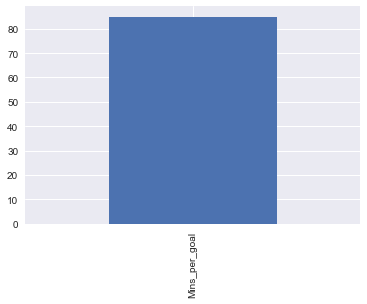

In [36]:
missing =df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

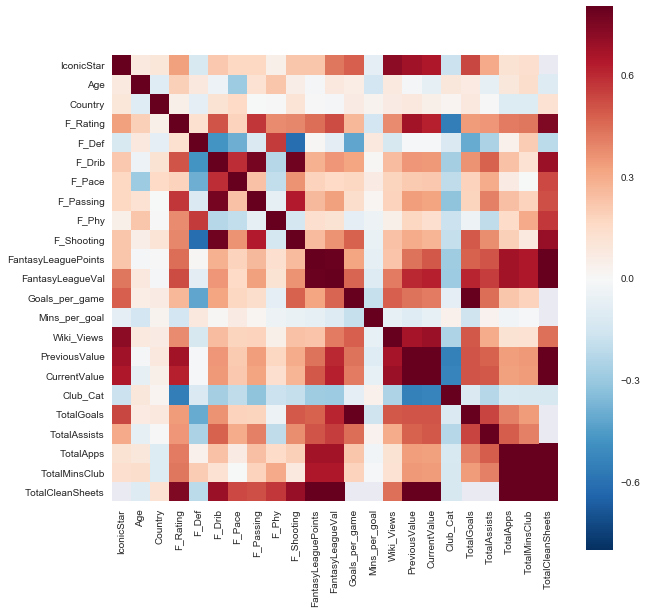

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,vmax=0.8,square=True)

In [40]:
df.columns

Index(['Name', 'IconicStar', 'Age', 'Country', 'Position', 'F_Rating', 'F_Def',
       'F_Drib', 'F_Pace', 'F_Passing', 'F_Phy', 'F_Shooting', 'F_WRate',
       'FantasyLeaguePoints', 'FantasyLeagueVal', 'Goals_per_game',
       'Mins_per_goal', 'Wiki_Views', 'PreviousValue', 'CurrentValue',
       'Club_Cat', 'TotalGoals', 'TotalAssists', 'TotalApps', 'TotalMinsClub',
       'TotalCleanSheets'],
      dtype='object')

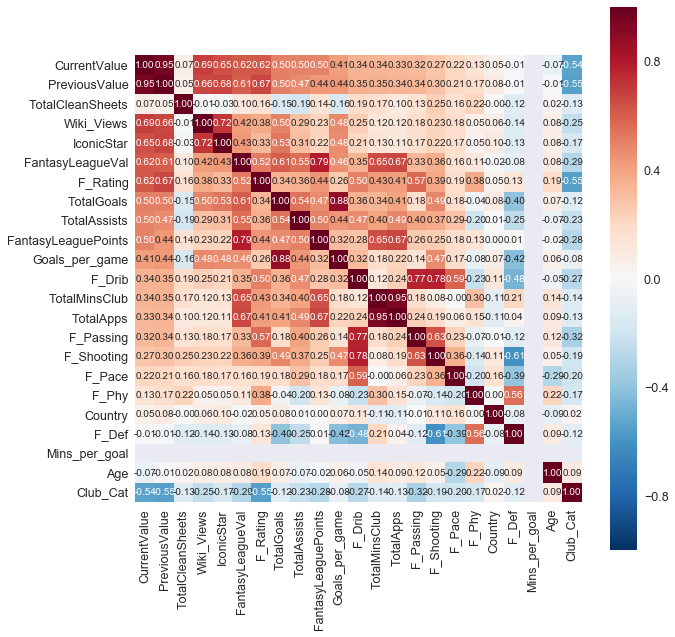

In [41]:
k=27
cols = corrmat.nlargest(k,'CurrentValue')['CurrentValue'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(10,10))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)


In [42]:
df.columns

Index(['Name', 'IconicStar', 'Age', 'Country', 'Position', 'F_Rating', 'F_Def',
       'F_Drib', 'F_Pace', 'F_Passing', 'F_Phy', 'F_Shooting', 'F_WRate',
       'FantasyLeaguePoints', 'FantasyLeagueVal', 'Goals_per_game',
       'Mins_per_goal', 'Wiki_Views', 'PreviousValue', 'CurrentValue',
       'Club_Cat', 'TotalGoals', 'TotalAssists', 'TotalApps', 'TotalMinsClub',
       'TotalCleanSheets'],
      dtype='object')

In [37]:
selected_cols = ['Name','Position','Wiki_Views','PreviousValue','Club_Cat',
                'TotalGoals','TotalAssists','TotalMinsClub','FantasyLeagueVal','F_Rating','F_Drib','F_Passing','CurrentValue']

In [38]:
selected_df = df[selected_cols]

In [39]:
selected_df.columns

Index(['Name', 'Position', 'Wiki_Views', 'PreviousValue', 'Club_Cat',
       'TotalGoals', 'TotalAssists', 'TotalMinsClub', 'FantasyLeagueVal',
       'F_Rating', 'F_Drib', 'F_Passing', 'CurrentValue'],
      dtype='object')

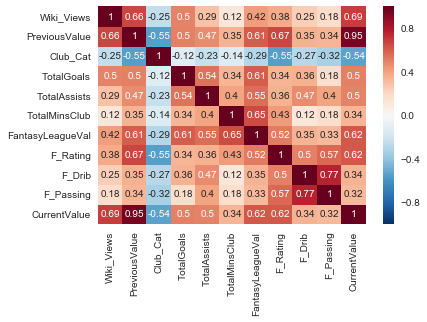

In [40]:
sns.heatmap(selected_df.corr(),annot=True)

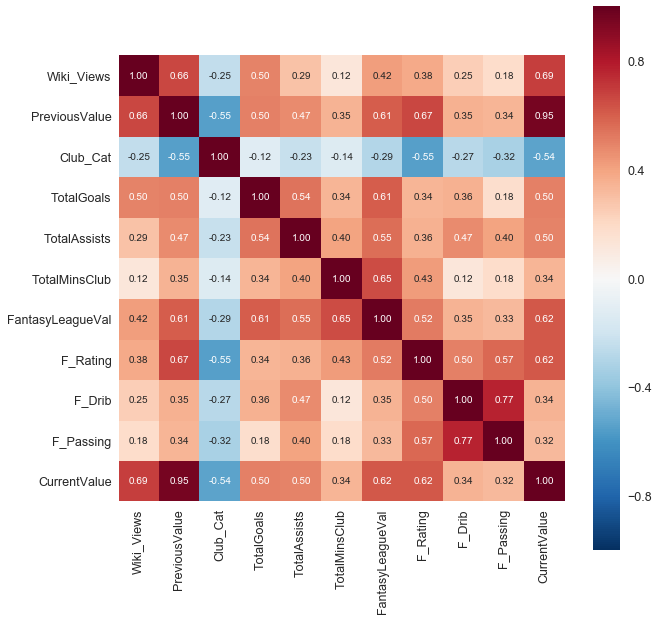

In [41]:
cols = selected_df.drop(['Name','Position'],axis=1).columns
cm = np.corrcoef(selected_df.drop(['Name','Position'],axis=1).values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(10,10))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

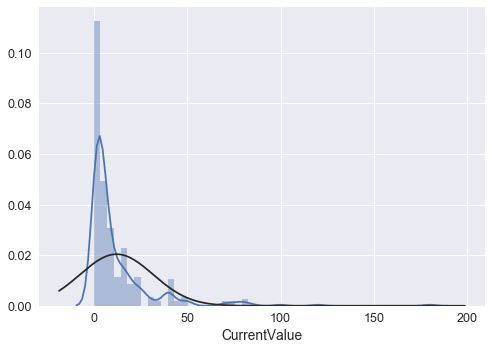

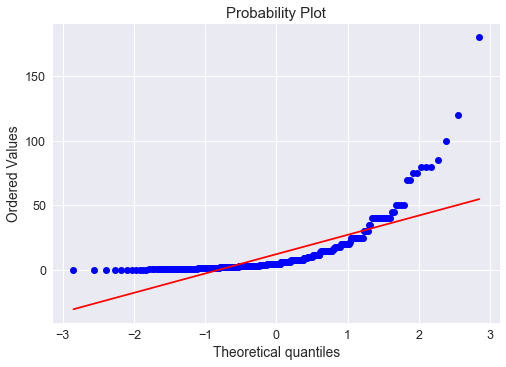

In [42]:

sns.distplot(selected_df['CurrentValue'], fit=st.norm);
fig = plt.figure()
res = st.probplot(selected_df['CurrentValue'], plot=plt)

In [49]:
selected_df['TransformedCurrVal'] = np.log(selected_df['CurrentValue'])

C:\Users\prabh\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
selected_df.drop(['TransforemedCurrVal'],axis=1,inplace=True)

ValueError: labels ['TransforemedCurrVal'] not contained in axis

In [43]:
sns.distplot(selected_df['TransformedCurrVal'], fit=st.norm);
fig = plt.figure()
res = st.probplot(selected_df['TransformedCurrVal'], plot=plt)

KeyError: 'TransformedCurrVal'

In [44]:
selected_df.columns

Index(['Name', 'Position', 'Wiki_Views', 'PreviousValue', 'Club_Cat',
       'TotalGoals', 'TotalAssists', 'TotalMinsClub', 'FantasyLeagueVal',
       'F_Rating', 'F_Drib', 'F_Passing', 'CurrentValue'],
      dtype='object')

In [45]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 13 columns):
Name                316 non-null object
Position            316 non-null object
Wiki_Views          316 non-null int64
PreviousValue       316 non-null float64
Club_Cat            316 non-null int64
TotalGoals          316 non-null int64
TotalAssists        316 non-null int64
TotalMinsClub       316 non-null int64
FantasyLeagueVal    316 non-null float64
F_Rating            316 non-null int64
F_Drib              316 non-null int64
F_Passing           316 non-null int64
CurrentValue        316 non-null float64
dtypes: float64(3), int64(8), object(2)
memory usage: 32.2+ KB


In [46]:
selected_df.head()

,Name,Position,Wiki_Views,PreviousValue,Club_Cat,TotalGoals,TotalAssists,TotalMinsClub,FantasyLeagueVal,F_Rating,F_Drib,F_Passing,CurrentValue
0,Lionel Messi,Winger,23736,120.0,1,51,19,4452,30.0,93,95,86,180.0
1,Sergio Busquets,CDM,1124,60.0,1,1,5,4006,11.5,86,74,79,80.0
2,Ousmane Dembélé,Winger,4782,33.0,1,6,14,2158,3.5,83,88,75,80.0
3,Ivan Rakitic,CM,9,45.0,1,7,9,3796,15.0,87,82,86,45.0
4,Jordi Alba,Defender,792,32.0,1,2,12,3394,13.0,85,82,75,40.0


In [47]:
selected_df.to_csv('selected.csv',encoding='utf-8')

In [64]:
position = pd.get_dummies(selected_df['Position'],drop_first=True)

In [65]:
club = pd.get_dummies(selected_df['Club_Cat'],drop_first=True)

In [53]:
df.columns

Index(['Name', 'IconicStar', 'Age', 'Country', 'Position', 'F_Rating', 'F_Def',
       'F_Drib', 'F_Pace', 'F_Passing', 'F_Phy', 'F_Shooting', 'F_WRate',
       'FantasyLeaguePoints', 'FantasyLeagueVal', 'Goals_per_game',
       'Mins_per_goal', 'Wiki_Views', 'PreviousValue', 'CurrentValue',
       'Club_Cat', 'TotalGoals', 'TotalAssists', 'TotalApps', 'TotalMinsClub',
       'TotalCleanSheets'],
      dtype='object')

In [54]:
X = selected_df.drop(['Name','CurrentValue','Position','Club_Cat'],axis=1)

In [55]:
X = pd.concat([X,position,club],axis=1)

In [57]:
#y1 = selected_df['TransformedCurrVal']
y2 = selected_df['CurrentValue']

In [58]:
from sklearn.model_selection import train_test_split

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.25)

In [212]:
from sklearn.linear_model import LinearRegression

In [213]:
linreg1 = LinearRegression()

In [214]:
linreg1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [215]:
print(linreg1.score(X_test,y_test))
print(linreg1.score(X_train,y_train))
print(linreg1.score(X,y1))

0.7449929095
0.765957330882
0.759981762526


In [193]:
from sklearn.model_selection import cross_val_score

In [194]:
scores = cross_val_score(linreg1,X,y1,cv=10,scoring='r2')
scores.mean()

0.38449161308950763

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.25)

In [135]:
linreg2 = LinearRegression()
linreg2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [136]:
predictions = linreg2.predict(X_test)

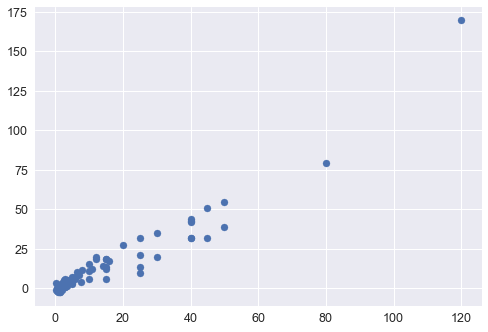

In [137]:
plt.scatter(y_test,predictions)

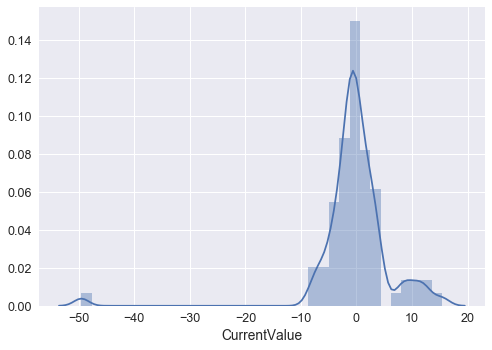

In [138]:
sns.distplot((y_test-predictions))

In [133]:
#print(linreg2.score(X_test,y_test))
#print(linreg2.score(X_train,y_train))

In [217]:
selected_df.head()

,Name,Position,Wiki_Views,PreviousValue,Club_Cat,TotalGoals,TotalAssists,TotalMinsClub,FantasyLeagueVal,F_Rating,F_Drib,F_Passing,CurrentValue,TransformedCurrVal
0,Lionel Messi,Winger,23736,120.0,1,51,19,4452,30.0,93,95,86,180.0,5.192957
1,Sergio Busquets,CDM,1124,60.0,1,1,5,4006,11.5,86,74,79,80.0,4.382027
2,Ousmane Dembélé,Winger,4782,33.0,1,6,14,2158,3.5,83,88,75,80.0,4.382027
3,Ivan Rakitic,CM,9,45.0,1,7,9,3796,15.0,87,82,86,45.0,3.806662
4,Jordi Alba,Defender,792,32.0,1,2,12,3394,13.0,85,82,75,40.0,3.688879


In [218]:
X.head()

,Wiki_Views,PreviousValue,TotalGoals,TotalAssists,TotalMinsClub,FantasyLeagueVal,F_Rating,F_Drib,F_Passing,CM,Defender,Keeper,Striker,Winger,2,3,4
0,23736,120.0,51,19,4452,30.0,93,95,86,0,0,0,0,1,0,0,0
1,1124,60.0,1,5,4006,11.5,86,74,79,0,0,0,0,0,0,0,0
2,4782,33.0,6,14,2158,3.5,83,88,75,0,0,0,0,1,0,0,0
3,9,45.0,7,9,3796,15.0,87,82,86,1,0,0,0,0,0,0,0
4,792,32.0,2,12,3394,13.0,85,82,75,0,1,0,0,0,0,0,0


In [219]:
y = selected_df['CurrentValue']

In [220]:
from sklearn.model_selection import cross_val_score

In [222]:
from sklearn import metrics

In [246]:
from sklearn import cross_validation

# Linear Regression

In [263]:
shuffle = cross_validation.KFold(len(X),n_folds=10,shuffle=True)
scores = cross_val_score(LinearRegression(), X, y, cv=shuffle, scoring="r2")
print(scores)
print(scores.mean())

[ 0.95597111  0.93126137  0.89370906  0.82171643  0.78194247  0.93803964
  0.90288202  0.65701981  0.86886579  0.91668102]
0.866808873629


In [267]:
shuffle = cross_validation.KFold(len(X),n_folds=10,shuffle=True)
scores = cross_val_score(LinearRegression(), X, y, cv=shuffle, scoring="neg_mean_squared_error")
scores = -scores
print(np.sqrt(scores))
print(np.sqrt(scores.mean()))

[ 10.65109289   7.00118099   4.39964915  10.24189857   5.04088788
   5.60383334   3.55937165   4.29372166   3.23127833   3.10736194]
6.28276406363


In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

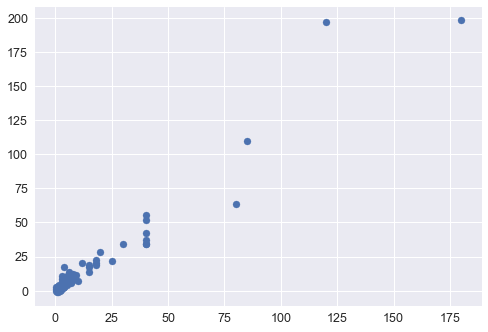

In [256]:
plt.scatter(y_test,pred)

In [269]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.897736907379
0.859942286502


In [270]:
respred = lr.predict(X)

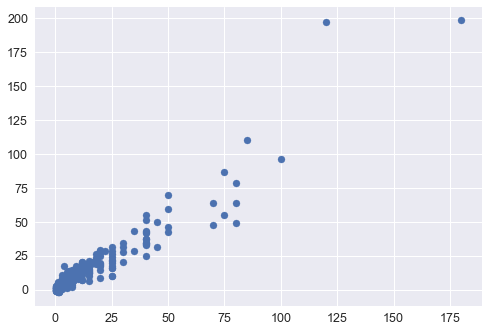

In [271]:
plt.scatter(y,respred)

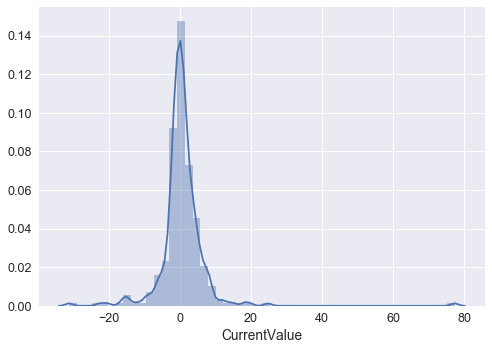

In [273]:
sns.distplot((respred-y))

In [278]:
pd.DataFrame(lr.coef_,X.columns,columns=['coeff'])

,coeff
Wiki_Views,0.003025
PreviousValue,0.913421
TotalGoals,-0.017097
TotalAssists,0.394786
TotalMinsClub,-0.000557
FantasyLeagueVal,0.540947
F_Rating,-0.146054
F_Drib,0.006561
F_Passing,-0.042855
CM,0.338905


# Ridge Regression

In [279]:
from sklearn.linear_model import Ridge

In [2]:
shuffle = cross_validation.KFold(len(X),n_folds=10,shuffle=True)
scores = cross_val_score(Ridge(), X, y, cv=shuffle, scoring="r2")
print(scores)
print(scores.mean())

NameError: name 'KFold' is not defined

In [288]:
maxmean=0
for alpha in [100,10,0,0.1,0.01,0.001]:
    shuffle = cross_validation.KFold(len(X),n_folds=10,shuffle=True)
    scores = cross_val_score(Ridge(), X, y, cv=shuffle, scoring="r2")
    meansc = scores.mean()
    if meansc > maxmean:
        maxmean = meansc
        alphamax = alpha
print(maxmean,alphamax)

0.881903036507 10


In [289]:
shuffle = cross_validation.KFold(len(X),n_folds=10,shuffle=True)
scores = cross_val_score(Ridge(alpha=10), X, y, cv=shuffle, scoring="r2")
print(scores)
print(scores.mean())

[ 0.81324414  0.87865968  0.95566462  0.81466782  0.84265365  0.87184225
  0.92349697  0.93690409  0.85328296  0.80964058]
0.870005676093


In [292]:
shuffle = cross_validation.KFold(len(X),n_folds=10,shuffle=True)
scores = cross_val_score(Ridge(alpha=10), X, y, cv=shuffle, scoring="neg_mean_squared_error")
print(-scores)
print(np.sqrt(-scores).mean())

[  27.42275732   38.67942631    6.75829235   17.31729678   10.23680203
   67.35975811    6.11917801   28.43686955   14.29204882  158.30335046]
5.37924983527


In [295]:
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train,y_train)
print(ridge_reg.score(X_train,y_train))
print(ridge_reg.score(X_test,y_test))

0.896410752668
0.850412140596


In [296]:
yres = ridge_reg.predict(X)

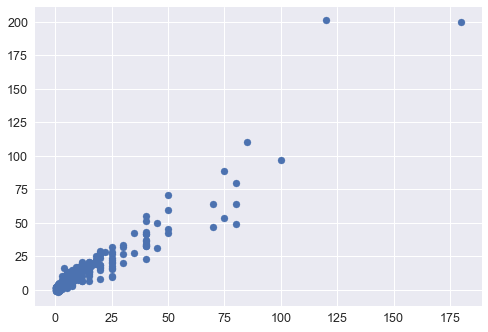

In [298]:
plt.scatter(y,yres)

# Random Forest

In [306]:
from sklearn.ensemble import RandomForestRegressor
x_scores=[]
for x in [10,50,100,125,150,175]:
    
    shuffle = cross_validation.KFold(len(X),n_folds=10,shuffle=True)
    scores = cross_val_score(RandomForestRegressor(n_estimators=x), X, y, cv=shuffle, scoring="r2")

    x_scores.append(scores.mean())

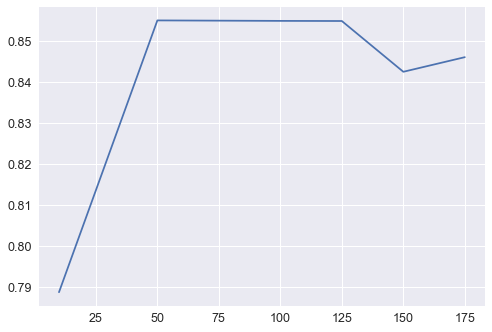

In [307]:
plt.plot([10,50,100,125,150,175],x_scores)

In [400]:
forest = RandomForestRegressor(n_estimators=100)
forest.fit(X_train,y_train)
print(forest.score(X_train,y_train))
print(forest.score(X_test,y_test))

0.979278758408
0.783317065065


In [324]:
shuffle = cross_validation.KFold(len(X),n_folds=10,shuffle=True)
scores= cross_val_score(RandomForestRegressor(n_estimators=100),X,y,cv=shuffle,scoring='r2')
print(scores)
print(scores.mean())

[ 0.86049163  0.76191068  0.78661953  0.90622352  0.75082823  0.87343447
  0.86556829  0.89269879  0.92834304  0.89659878]
0.852271696052


In [327]:
shuffle = cross_validation.KFold(len(X),n_folds=10,shuffle=True)
scores= cross_val_score(RandomForestRegressor(n_estimators=100),X,y,cv=shuffle,scoring='neg_mean_squared_error')
print(-scores)
print(np.sqrt(-scores).mean())

[  32.80410397   79.73355819  243.73133666   26.21941181   69.23688609
   30.7150765    15.18218868   60.19740252   33.0659911    10.7065681 ]
6.99297514022


# Gradient Boost

In [328]:
from sklearn.ensemble import GradientBoostingRegressor

In [335]:
gbr = GradientBoostingRegressor(max_depth=1)
gbr.fit(X_train,y_train)
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.932580553559
0.826749879779


In [362]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.98976829985
0.822902009601


In [379]:
gbr = GradientBoostingRegressor(n_estimators=125,learning_rate=0.065)
gbr.fit(X_train,y_train)
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.986263822205
0.830686069357


In [381]:
from sklearn.tree import DecisionTreeRegressor

In [391]:
tree_reg= DecisionTreeRegressor(max_depth=4)
tree_reg.fit(X_train,y_train)
print(tree_reg.score(X_train,y_train))
print(tree_reg.score(X_test,y_test))

0.955456930775
0.833707974222


In [390]:
shuffle = cross_validation.KFold(len(X),n_folds=10,shuffle=True)
scores= cross_val_score(DecisionTreeRegressor(max_depth=4),X,y,cv=shuffle,scoring='r2')
print(scores)
print(scores.mean())

[ 0.88554169  0.73876361  0.88843187  0.77726957  0.76961166  0.89993791
  0.90265827  0.76567437  0.85881175  0.75415651]
0.82408572044


In [394]:
shuffle = cross_validation.KFold(len(X),n_folds=10,shuffle=True)
scores= cross_val_score(DecisionTreeRegressor(),X,y,cv=shuffle,scoring='neg_mean_squared_error')
print(-scores)
print(np.sqrt(-scores).mean())

[  48.175        85.3996875    65.92625     149.15125      67.336875
   68.58125      51.65096774   42.38580645  137.84774194  109.80870968]
8.89186705832


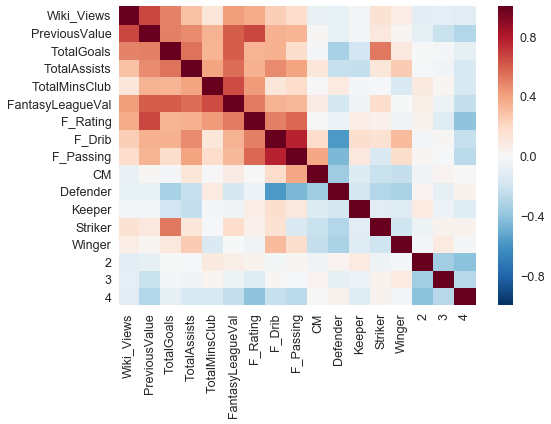

In [393]:
sns.heatmap(X.corr())

In [59]:
selected_df.head()

,Name,Position,Wiki_Views,PreviousValue,Club_Cat,TotalGoals,TotalAssists,TotalMinsClub,FantasyLeagueVal,F_Rating,F_Drib,F_Passing,CurrentValue
0,Lionel Messi,Winger,23736,120.0,1,51,19,4452,30.0,93,95,86,180.0
1,Sergio Busquets,CDM,1124,60.0,1,1,5,4006,11.5,86,74,79,80.0
2,Ousmane Dembélé,Winger,4782,33.0,1,6,14,2158,3.5,83,88,75,80.0
3,Ivan Rakitic,CM,9,45.0,1,7,9,3796,15.0,87,82,86,45.0
4,Jordi Alba,Defender,792,32.0,1,2,12,3394,13.0,85,82,75,40.0


In [63]:
selected_df = selected_df.sample(frac=1).reset_index(drop=True)

In [66]:
X = selected_df.drop(['Name','CurrentValue','Position','Club_Cat'],axis=1)
X = pd.concat([X,position,club],axis=1)

In [67]:
X.head()

,Wiki_Views,PreviousValue,TotalGoals,TotalAssists,TotalMinsClub,FantasyLeagueVal,F_Rating,F_Drib,F_Passing,CM,Defender,Keeper,Striker,Winger,2,3,4
0,672,8.0,4,2,1173,8.0,78,76,65,0,0,0,1,0,1,0,0
1,17,6.0,0,0,2204,8.0,80,83,74,0,0,1,0,0,1,0,0
2,133,10.0,0,1,1731,2.0,77,69,81,0,0,0,0,0,1,0,0
3,1251,8.5,2,6,2299,3.5,77,81,75,0,0,0,0,1,1,0,0
4,39,3.0,2,3,1170,2.0,71,74,70,0,0,0,0,1,0,1,0


In [68]:
y = selected_df['CurrentValue']